## Image Classification CNN Model: Fashion MNIST Dataset

#### Introduction: Packages and Data

In [1]:
#import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
tf.random.set_seed(42)


In [2]:
#import data.This data is ready to download and it is already split into training and test data
(x_train,y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [3]:
#lets check the data out
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [5]:
#let's explore the dependent variable
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Each number in the arrey above corresponds to one clothing category. 

**What do these numbers mean?**

According to the [Fashion MNIST Github site](https://github.com/zalandoresearch/fashion-mnist#labels), this is what each number 0-9 corresponds to:

| Label  | Description  |
|---|---|
|  0 | T-shirt/top  |
|  1 |  Trouser |
|  2 |   Pullover |
|  3 |  Dress |
|  4 |  Coat |
|  5 |  Sandal |
|  6 |   Shirt |
|  7 |  Sneaker |
|  8 |   Bag |
|  9 |  Ankle boot |

In [6]:
#let's greate a list of the category labels to have in handy for use later
labels = ["T-shirt/top", 
          "Trouser", 
          "Pullover",
          "Dress", 
          "Coat",
          "Sandal", 
          "Shirt", 
          "Sneaker", 
          "Bag", 
          "Ankle boot"]

In [8]:
#let's check out the make up of one of our images
labels[y_train[5]]

'Pullover'

In [9]:
#extract the raw data (numbers) for the image
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

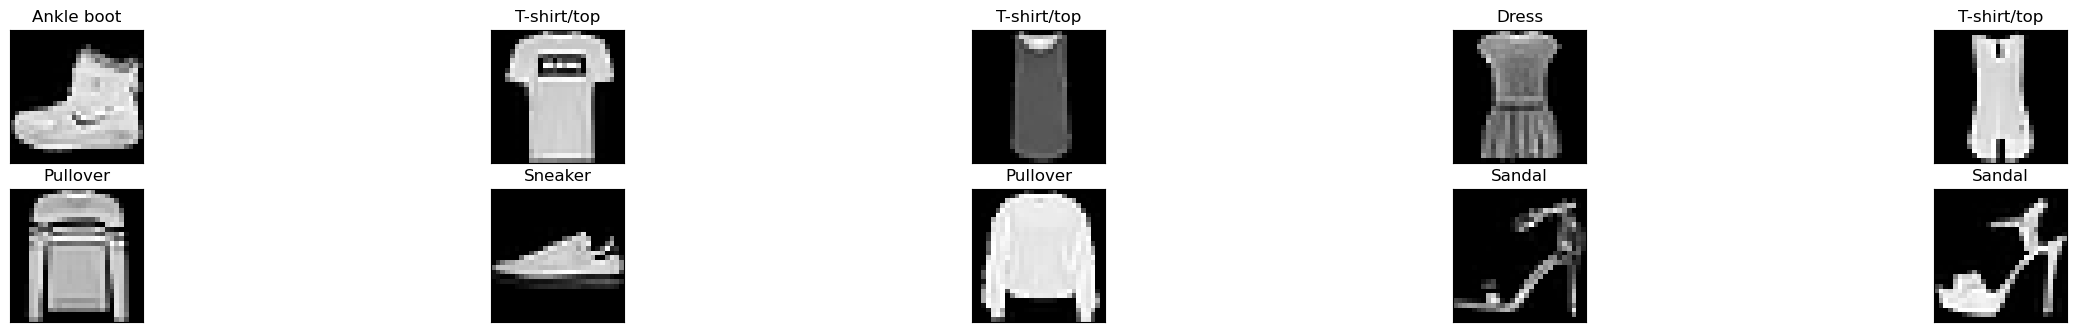

In [10]:
#finally, let's check out the first 10 images
fig = plt.figure(figsize = (30,10))
for i in range(10):
    ax = fig.add_subplot(5,5, i+1, xticks=[], yticks= [])
    ax.set_title(f"{labels[y_train[i]]}")
    ax.imshow(x_train[i], cmap="gray")

#### Model 1: Single Layer Neural Network

In [11]:
#normalize the data because NNs work better with independent variables in small range. The inputs here range from 0 to 255. 
#Let's normalize to the 0-1 range by dividing everything by 255.
x_train = x_train/255.0
x_test = x_test/255.0


In [14]:
#define model in keras
#input layer 
input = keras.Input(shape = (28,28))

#convert the matrix into a vector by flattening it
h = keras.layers.Flatten()(input)

#fid the vector into the hidden layer
h = keras.layers.Dense(256, activation = "relu", name= "Hidden")(h)

#take the hidden layer output and feed it into the output layer
output = keras.layers.Dense(10, activation = "softmax", name = "Output")(h)

#bind the input and output into the keras model
model = keras.Model(input, output)


In [15]:
#let's check the model out
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden (Dense)                       │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#set optimization parameters
model.compile(loss= "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [17]:
#train model

batch_size = 32
epochs = 10

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7901 - loss: 0.6033
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8642 - loss: 0.3738
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8788 - loss: 0.3311
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8883 - loss: 0.3044
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8946 - loss: 0.2858
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9000 - loss: 0.2694
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9034 - loss: 0.2570
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9100 - loss: 0.2423
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9128 - loss: 0.2330
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9155 - loss: 0.2244


In [18]:
#evaluate model
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8718 - loss: 0.3742


[0.3759641945362091, 0.8723999857902527]

#### Model 2: Convolutional Neural Network (CNN)

##### Prepare the Data

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
#lets add another dimension to the data, it is typically needed for colored images 
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [21]:
x_train.shape

(60000, 28, 28, 1)

##### Define Model

In [25]:
# input layer
input = keras.Input(shape = x_train.shape[1:])

#first convolutional block
x= keras.layers.Conv2D(32, kernel_size = (2,2), activation = "relu", name = "Conv_1") (input) #conv layer
x = keras.layers.MaxPool2D()(x) #pooling layer

#second conv block
x = keras.layers.Conv2D(32, kernel_size = (2,2,), activation = "relu", name = "Conv_2")(x)
x = keras.layers.MaxPool2D()(x)

#flatten the layers and add hiden layer
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation = "relu")(x)

#output layer definition
output = keras.layers.Dense(10, activation = "softmax")(x)

#bind input output into model
model = keras.Model(input, output)



In [26]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_1 (Conv2D)                      │ (None, 27, 27, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_2 (Conv2D)                      │ (None, 12, 12, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,026 (1.15 MB)

 Trainable params: 302,026 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

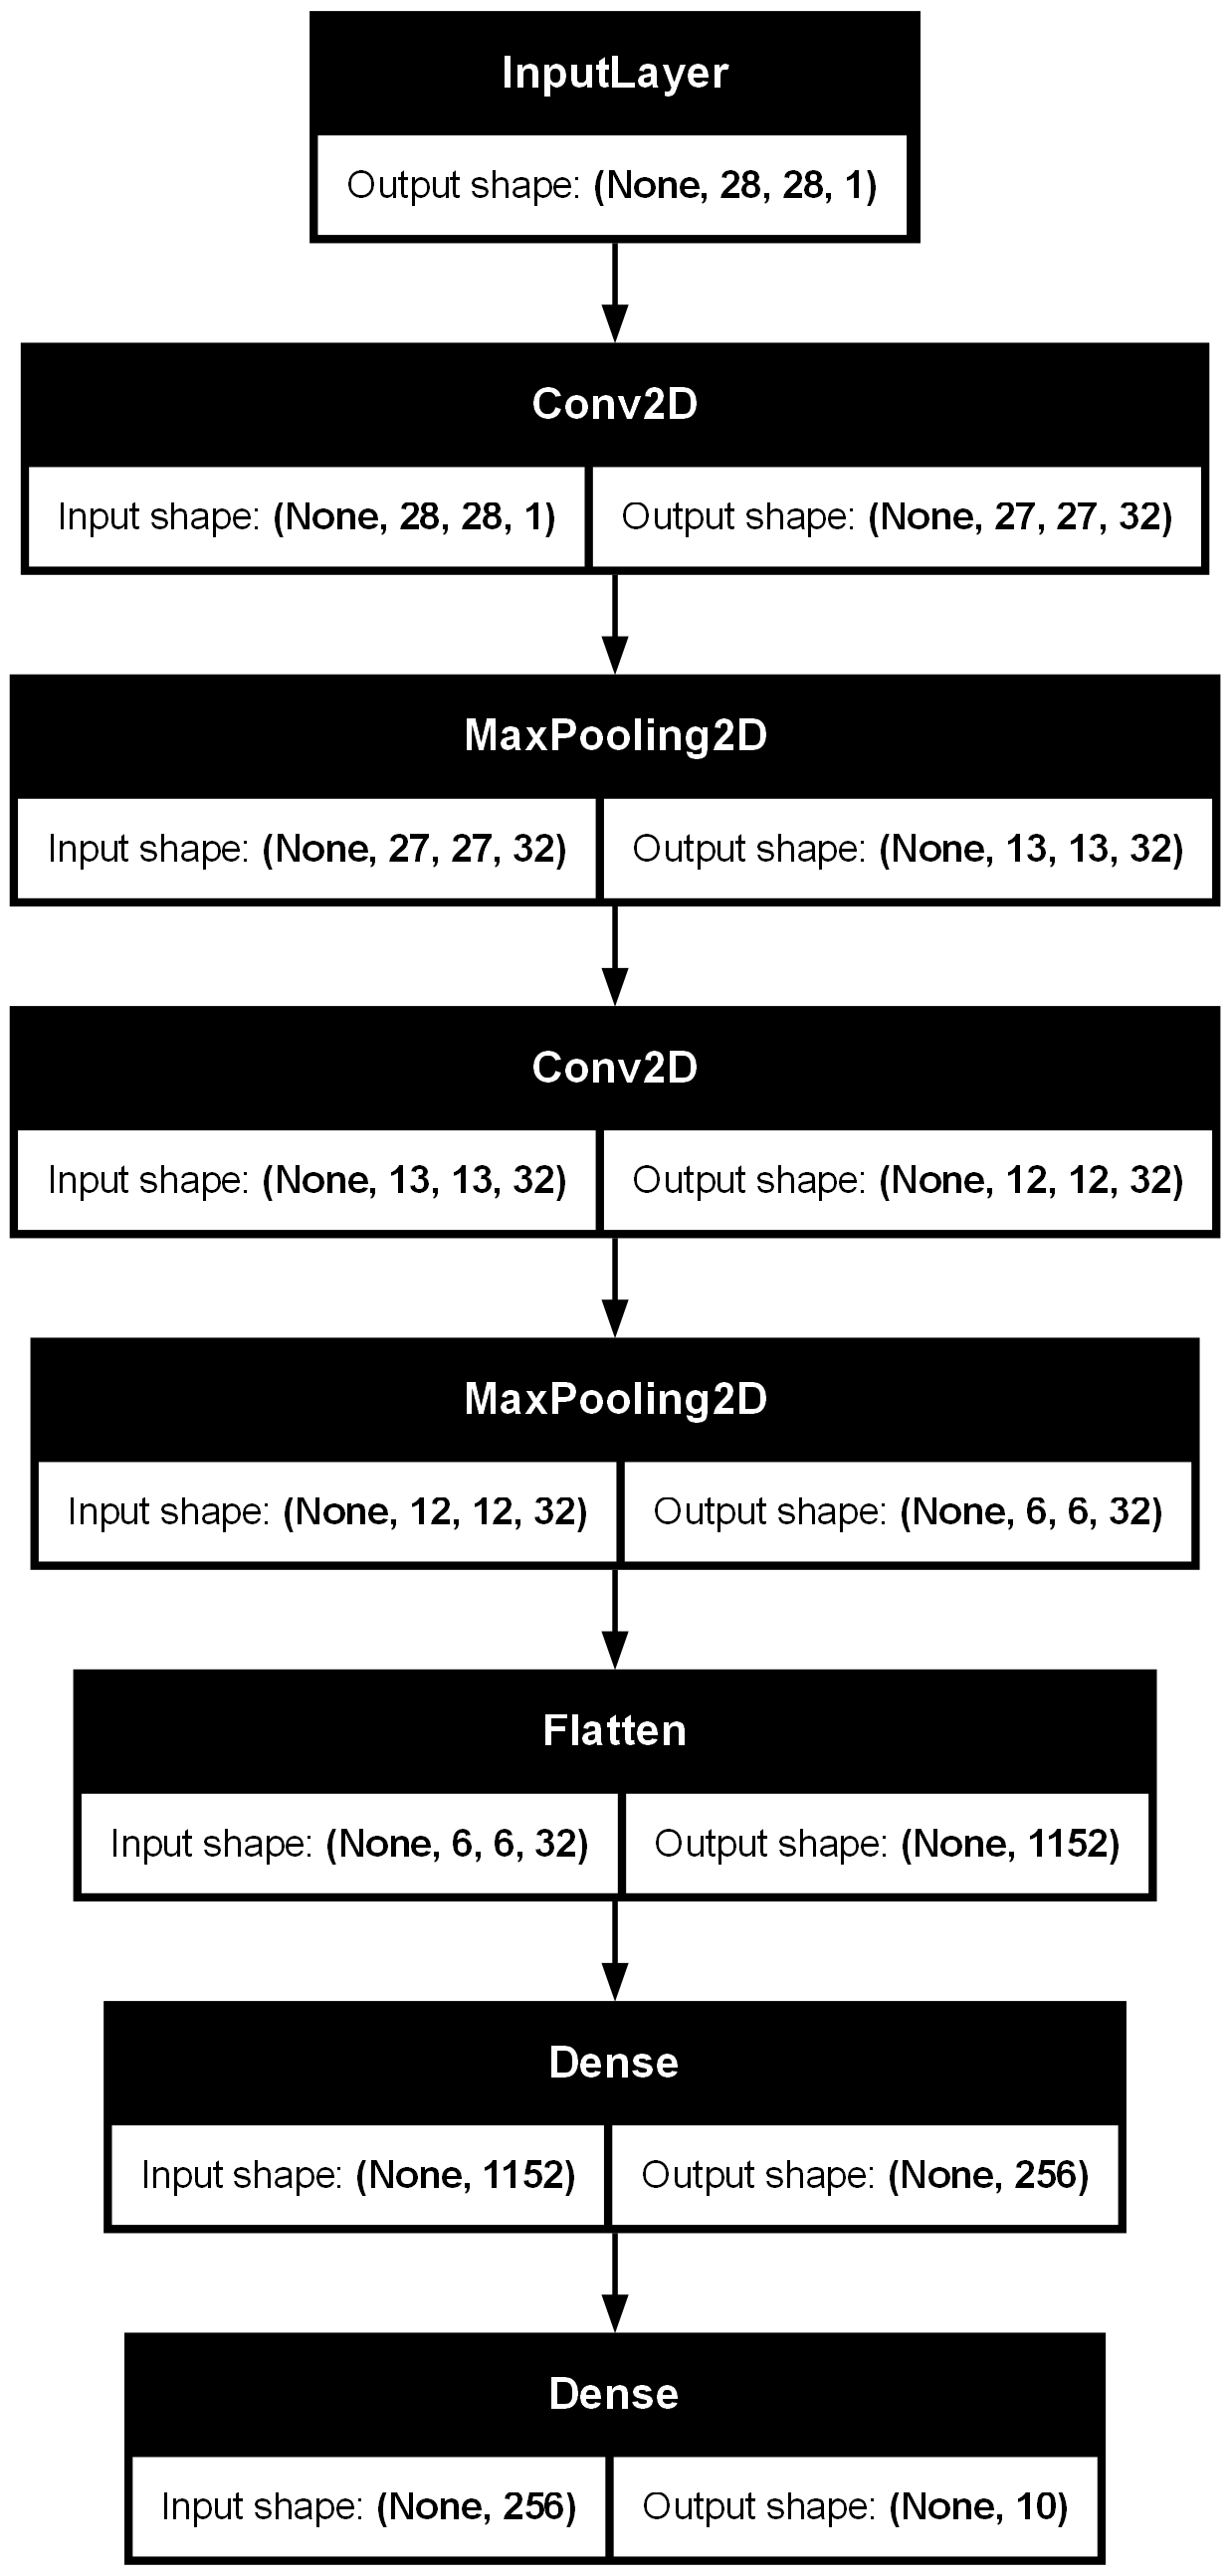

In [29]:
#visualize model 
keras.utils.plot_model(model, show_shapes = True)



##### Model Optimization and Training

In [30]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics =["accuracy"])

In [36]:
batch_size = 32
epochs = 10
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9465 - loss: 0.1429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9590 - loss: 0.1110
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9660 - loss: 0.0937
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9723 - loss: 0.0811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9752 - loss: 0.0711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9765 - loss: 0.0649
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9791 - loss: 0.0576
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9818 - loss: 0.0529
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9824 - loss: 0.0497
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9818 - loss: 0.0473


##### Evaluate the Model

In [37]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9019 - loss: 0.5460


In [38]:
print("Test accuracy:", score[1])

Test accuracy: 0.9034000039100647


### The END!